In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.decomposition import PCA
import pickle
from tqdm.notebook import tqdm

In [76]:
dataset_description = pd.read_csv('../Data/Dataset_Description.csv')

In [77]:
# dataset_description

In [78]:
population_data_raw = pd.read_csv('../Data/population.csv')
# population_data_raw 

In [79]:
def preprocessing(df):

    #replace ? with Nan
    df = df.replace({' ?' :  np.nan})

    #drop columns with more than 40$ NaN values
    cols = df.columns
    missing_percentages = (df.isna().sum() / len(df)) * 100
    cols_to_drop = []
    for col in cols:
        if(missing_percentages[col] > 40.0):
            cols_to_drop.append(col)
    print(f'Dropping = {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

In [80]:
data = preprocessing(population_data_raw)
print(data.shape)

Dropping = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']
(199523, 36)


In [81]:
def plot_histogram(df, numeric_columns, categorical_columns):
    # features = df.columns
    # for feat in features:
    #     plt.figure(figsize=(25,5))
    #     if(feat in numeric_columns):
    #         df[feat].hist(bins=10,edgecolor='black', linewidth=1.5)

    #     else:
    #         unique_cat_values = len(df[feat].unique())
    #         print(f'No. of unique Categories : {unique_cat_values}')
    #         df[feat].hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
    #     plt.xlabel(feat)
    #     plt.ylabel('Count')
    #     plt.title(f'Histogram : {feat}')
    #     plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
    #     plt.show()
    features = df.columns
    for feat in features:
        plt.figure(figsize=(25, 5))
        # if(feat in numeric_columns)
        unique_cat_values = len(df[feat].unique())
        print(f'No. of unique Categories : {unique_cat_values}')
        df[feat].astype(str).hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.title(f'Histogram : {feat}')
        plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
        plt.show()

In [82]:
def compute(df, col):
    max_freq = df[col].value_counts().max()
    max_perc = (max_freq / df.shape[0]) * 100
    print(max_perc)

In [83]:
def feature_analysis(df):
    data_columns = df.columns
    numeric_columns = ['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']
    all_cols_set = set(data_columns)
    numerical_cols_set = set(numeric_columns)
    categorical_cols = list(all_cols_set - numerical_cols_set)
    
    for col in numeric_columns:
        df[col] = pd.cut(x=df[col], bins=6)
    # df['AAGE']
    # plot_histogram(df, numeric_columns, categorical_cols)
    total_count = df.shape[0]

    cols_to_drop = []
    for col in data_columns:
        max_freq = df[col].value_counts().max()
        max_perc = (max_freq / total_count) * 100
        if(max_perc > 80.0):
            cols_to_drop.append(col)
    print(f'Dropping {len(cols_to_drop)} cols \n {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

    # print(df)


    # print(categorical_cols)


In [84]:
# data.mode()

In [85]:
data = feature_analysis(data)

Dropping 16 cols 
 ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA']


In [86]:
data.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'PARENT', 'PEFNTVTY', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [87]:
data.isna().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AMARITL        0
AMJIND         0
AMJOCC         0
ASEX           0
AWKSTAT        0
FILESTAT       0
HHDFMX         0
HHDREL         0
MIGSAME        0
NOEMP          0
PARENT         0
PEFNTVTY    6713
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64

In [88]:
data.mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,PEFNTVTY,VETYN,WKSWORK,YEAR
0,"(-0.09, 15.0]",Not in universe,0,0,High school graduate,Never married,Not in universe or children,Not in universe,Female,Children or Armed Forces,Nonfiler,Householder,Householder,Not in universe under 1 year old,0,Not in universe,United-States,2,"(-0.052, 8.667]",94


In [89]:
def column_modifications(df):
    column_modes = df.mode()
    data_cols = df.columns
    print(df.isna().sum())
    for col in data_cols:
        missing_vals = df[col].isna().sum()
        if(missing_vals > 0):
            df[col] = df[col].fillna(column_modes[col][0])
    print(df.isna().sum())
    one_hot_encoded = pd.get_dummies(df, columns=list(df.columns))
    df = one_hot_encoded

    return df        


In [90]:
data = column_modifications(data)
print(data.shape)

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AMARITL        0
AMJIND         0
AMJOCC         0
ASEX           0
AWKSTAT        0
FILESTAT       0
HHDFMX         0
HHDREL         0
MIGSAME        0
NOEMP          0
PARENT         0
PEFNTVTY    6713
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64
AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64
(199523, 307)


In [91]:
data

,"AAGE_(-0.09, 15.0]","AAGE_(15.0, 30.0]","AAGE_(30.0, 45.0]","AAGE_(45.0, 60.0]","AAGE_(60.0, 75.0]","AAGE_(75.0, 90.0]",ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,...,VETYN_1,VETYN_2,"WKSWORK_(-0.052, 8.667]","WKSWORK_(8.667, 17.333]","WKSWORK_(17.333, 26.0]","WKSWORK_(26.0, 34.667]","WKSWORK_(34.667, 43.333]","WKSWORK_(43.333, 52.0]",YEAR_94,YEAR_95
0,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
199519,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
199520,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
199521,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1


PCA

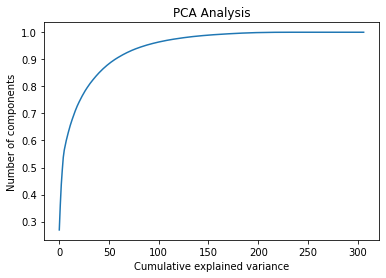

In [92]:
pca = PCA()
pca.fit(np.array(data))
exp_var_rat = pca.explained_variance_ratio_
cum_exp_var_perc = np.cumsum(exp_var_rat)
plt.plot(cum_exp_var_perc)
plt.xlabel('Cumulative explained variance')
plt.ylabel('Number of components')
plt.title('PCA Analysis')
plt.savefig('../Plots/Dimesionality_Reduction/pca_plot.png', facecolor='white', bbox_inches='tight')
plt.show()


In [93]:
print(cum_exp_var_perc[30])

0.8059342801852417


In [94]:
# exp_var = []
# for comp in tqdm(range(2, 111)):
#     pca = PCA(comp)
#     pca.fit(np.array(data))
#     exp_var_rat = round(sum(list(pca.explained_variance_ratio_))*100, 2)
#     print(f'comps = {comp} | var = {exp_var_rat}')
#     exp_var.append(exp_var_rat)

In [95]:
# plt.plot([x for x in range(2, 101)], exp_var)


In [96]:
pca_final = PCA(n_components=30)
dim_reduced_data = pca_final.fit_transform(np.array(data))

In [97]:
dim_reduced_data.shape

(199523, 30)

CLUSTERING

In [98]:
num_samples = data.shape[0]


In [99]:
avg_within_cluster_distance = {}
temp_avg_within_cluster_distance = {}
for k_value in tqdm(range(10, 25)):

    print(f'-------- K VALUE = {k_value} --------')
    random_points = np.array(pd.DataFrame(dim_reduced_data).sample(n=k_value)).tolist()

    # print('PERFORMING CLUSTERING')
    medians_init = random_points
    kmedians_clusterer = kmedians(dim_reduced_data, medians_init)
    kmedians_clusterer.process()

    file = open(f'../models/kmedians_{k_value}.pickle', 'wb')
    pickle.dump(kmedians_clusterer, file)
    file.close()

    avg_cluster_dist = kmedians_clusterer.get_total_wce() / k_value
    temp_avg_cluster_dist = kmedians_clusterer.get_total_wce() / num_samples
    
    avg_within_cluster_distance[k_value] = avg_cluster_dist
    temp_avg_within_cluster_distance[k_value] = temp_avg_cluster_dist
    print(f'average within cluster distance = {avg_cluster_dist}')
    print(f'Temp average within cluster distance = {avg_cluster_dist}')
    # print('INSTANCE PROCESSED')
    clusters = kmedians_clusterer.get_clusters()
    medians = kmedians_clusterer.get_medians()
    np.save(f'../model_info/clusters_{k_value}.npy', np.array(clusters))
    np.save(f'../model_info/medians_{k_value}.npy', np.array(medians))

    # print('CLUSTERING PERFORMED')



  0%|          | 0/15 [00:00<?, ?it/s]

-------- K VALUE = 10 --------
average within cluster distance = 146234.88291260303
Temp average within cluster distance = 146234.88291260303
-------- K VALUE = 11 --------


C:\Users\SAMYAK~1\AppData\Local\Temp/ipykernel_41928/2287205978.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f'../model_info/clusters_{k_value}.npy', np.array(clusters))


average within cluster distance = 147652.9226291652
Temp average within cluster distance = 147652.9226291652
-------- K VALUE = 12 --------
average within cluster distance = 115286.2611877601
Temp average within cluster distance = 115286.2611877601
-------- K VALUE = 13 --------
average within cluster distance = 114640.95284172031
Temp average within cluster distance = 114640.95284172031
-------- K VALUE = 14 --------
average within cluster distance = 97418.1117005153
Temp average within cluster distance = 97418.1117005153
-------- K VALUE = 15 --------
average within cluster distance = 81576.28072263119
Temp average within cluster distance = 81576.28072263119
-------- K VALUE = 16 --------
average within cluster distance = 87320.25564299115
Temp average within cluster distance = 87320.25564299115
-------- K VALUE = 17 --------
average within cluster distance = 79353.45536390285
Temp average within cluster distance = 79353.45536390285
-------- K VALUE = 18 --------
average within clust

In [100]:
# random_points = np.array(pd.DataFrame(B).sample(n=10)).tolist()

In [101]:
avg_within_cluster_distance

{10: 146234.88291260303,
 11: 147652.9226291652,
 12: 115286.2611877601,
 13: 114640.95284172031,
 14: 97418.1117005153,
 15: 81576.28072263119,
 16: 87320.25564299115,
 17: 79353.45536390285,
 18: 76330.52099880119,
 19: 73664.92606442898,
 20: 61547.76400327999,
 21: 56102.96942088386,
 22: 61293.08505866686,
 23: 46677.0094849013,
 24: 51124.26684204044}

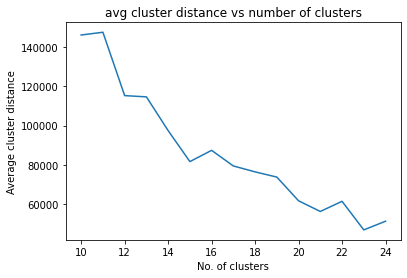

In [103]:
plt.plot([x for x in range(10, 25)], list(avg_within_cluster_distance.values()))
plt.xlabel('No. of clusters')
plt.ylabel('Average cluster distance')
plt.title('avg cluster distance vs number of clusters')
plt.show()

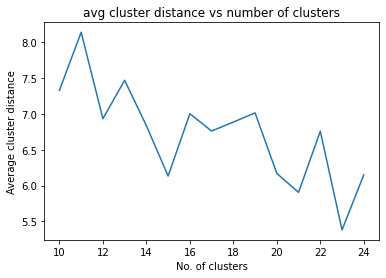

In [104]:
plt.plot([x for x in range(10, 25)], list(temp_avg_within_cluster_distance.values()))
plt.xlabel('No. of clusters')
plt.ylabel('Average cluster distance')
plt.title('avg cluster distance vs number of clusters')
plt.show()


In [ ]:
def plot_k_clusters(data_points, k_clusters, k_medians, k):
    return


Using 3 dimensional data for visulaization

In [122]:
pca_3d = PCA(n_components=3)
dim_3d_data = pca_3d.fit_transform(data)

In [123]:
k_value_3d = 10
print(f'-------- K VALUE = {k_value_3d} --------')
random_points_3d = np.array(pd.DataFrame(dim_3d_data).sample(n=k_value_3d)).tolist()

# print('PERFORMING CLUSTERING')
medians_init_3d = random_points_3d
kmedians_clusterer_3d = kmedians(dim_3d_data, medians_init_3d)
kmedians_clusterer_3d.process()

# file = open(f'../models/kmedians_{k_value}.pickle', 'wb')
# pickle.dump(kmedians_clusterer, file)
# file.close()

avg_cluster_dist_3d = kmedians_clusterer_3d.get_total_wce() / k_value_3d
temp_avg_cluster_dist_3d = kmedians_clusterer_3d.get_total_wce() / dim_3d_data.shape[0]

# avg_within_cluster_distance[k_value] = avg_cluster_dist
# temp_avg_within_cluster_distance[k_value] = temp_avg_cluster_dist
print(f'average within cluster distance = {avg_cluster_dist_3d}')
print(f'Temp average within cluster distance = {temp_avg_cluster_dist_3d}')
# print('INSTANCE PROCESSED')
clusters_3d = kmedians_clusterer_3d.get_clusters()
medians_3d = kmedians_clusterer_3d.get_medians()
# np.save(f'../model_info/clusters_{k_value}.npy', np.array(clusters))
# np.save(f'../model_info/medians_{k_value}.npy', np.array(medians))

-------- K VALUE = 10 --------
average within cluster distance = 6609.587728859474
Temp average within cluster distance = 0.3312694641148877


In [153]:
# dim_3d_data
pca_df = pd.DataFrame(dim_3d_data, columns=['pca-one', 'pca-two', 'pca-three'])
pca_df['cluster'] = 0

for clust_idx in range(len(clusters_3d)):
    for point_idx in clusters_3d[clust_idx]:
        pca_df.iloc[point_idx]['cluster'] = clust_idx + 1
pca_df    
# pca_df
# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# # ax.view_init(20, 90)
# ax.scatter(
#     xs=pca_df['pca-one'], 
#     ys=pca_df['pca-two'], 
#     zs=pca_df['pca-three'], 
#     # c=df_cur["label"], 
#     cmap='coolwarm',
# )
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.show()

C:\Users\Samyak Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [142]:
print(kmedians_clusterer_3d.get_cluster_encoding())

type_encoding.CLUSTER_INDEX_LIST_SEPARATION
